In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
dataset = pd.read_csv(r"/kaggle/input/college-placement/placement-dataset.csv")
dataset = dataset[['cgpa','iq','placement']]
dataset

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [4]:
dataset.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

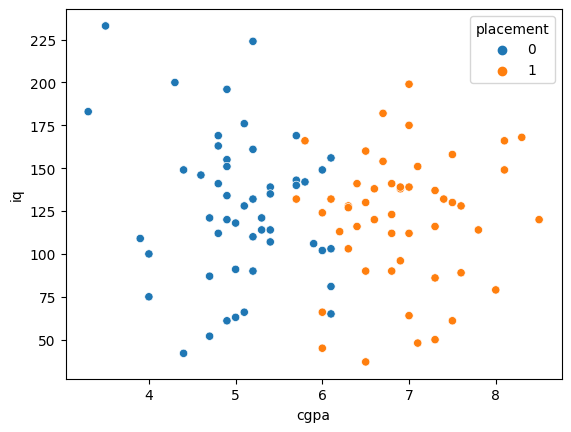

In [5]:
sns.scatterplot(x="cgpa",y="iq",data=dataset,hue="placement")
plt.show()

In [6]:
x= dataset.iloc[:,:-1]
y = dataset["placement"]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


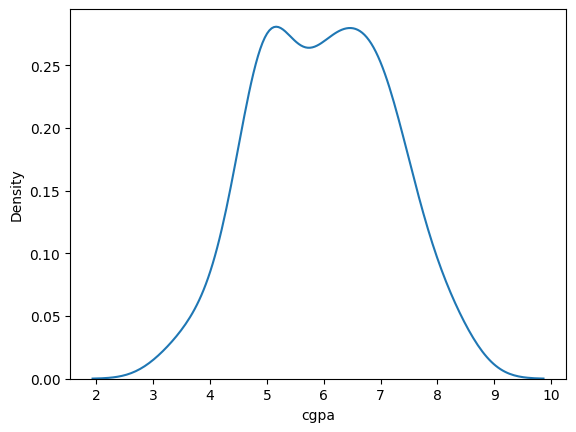

In [7]:
sns.kdeplot(data=dataset["cgpa"])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


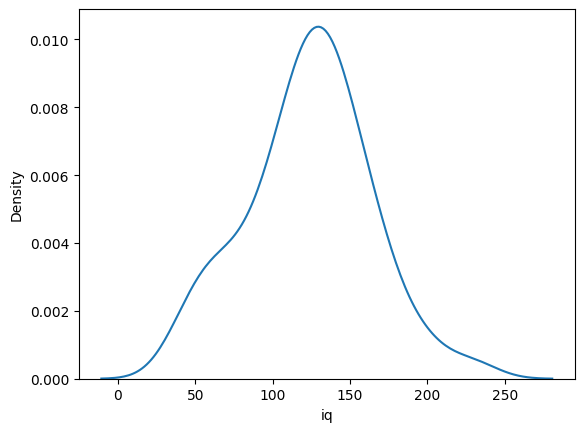

In [8]:
sns.kdeplot(data=dataset["iq"])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


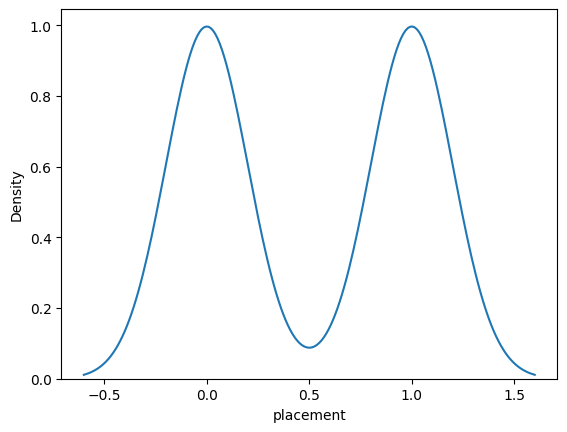

In [9]:
sns.kdeplot(data=dataset["placement"])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [13]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [14]:
gnb.score(x_test,y_test)*100 ,gnb.score(x_train,y_train)*100

(85.0, 91.25)

In [15]:
gnb.predict([[6.17,5.17]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [16]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [17]:
mnb.score(x_test,y_test)*100 ,mnb.score(x_train,y_train)*100

(95.0, 70.0)

In [18]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [19]:
bnb.score(x_test,y_test)*100 ,bnb.score(x_train,y_train)*100


(50.0, 50.0)

In [20]:
import numpy as np

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


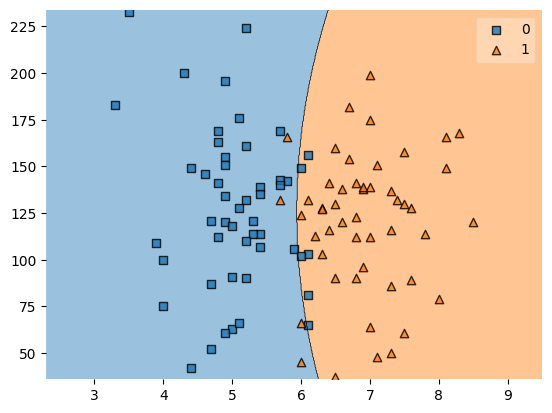

In [21]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


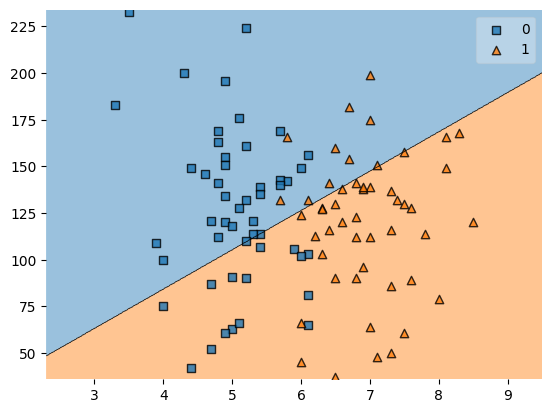

In [22]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=mnb)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


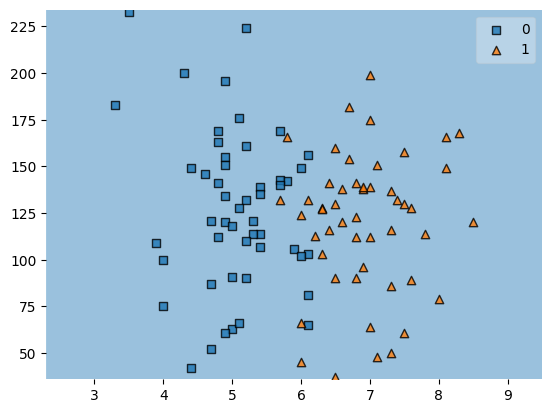

In [23]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=bnb)
plt.show()